시그모이드 함수 그래프 그리기 + 비교를 위해 소프트맥스와 하이퍼볼릭탄젠트를 같이 그려보았습니다

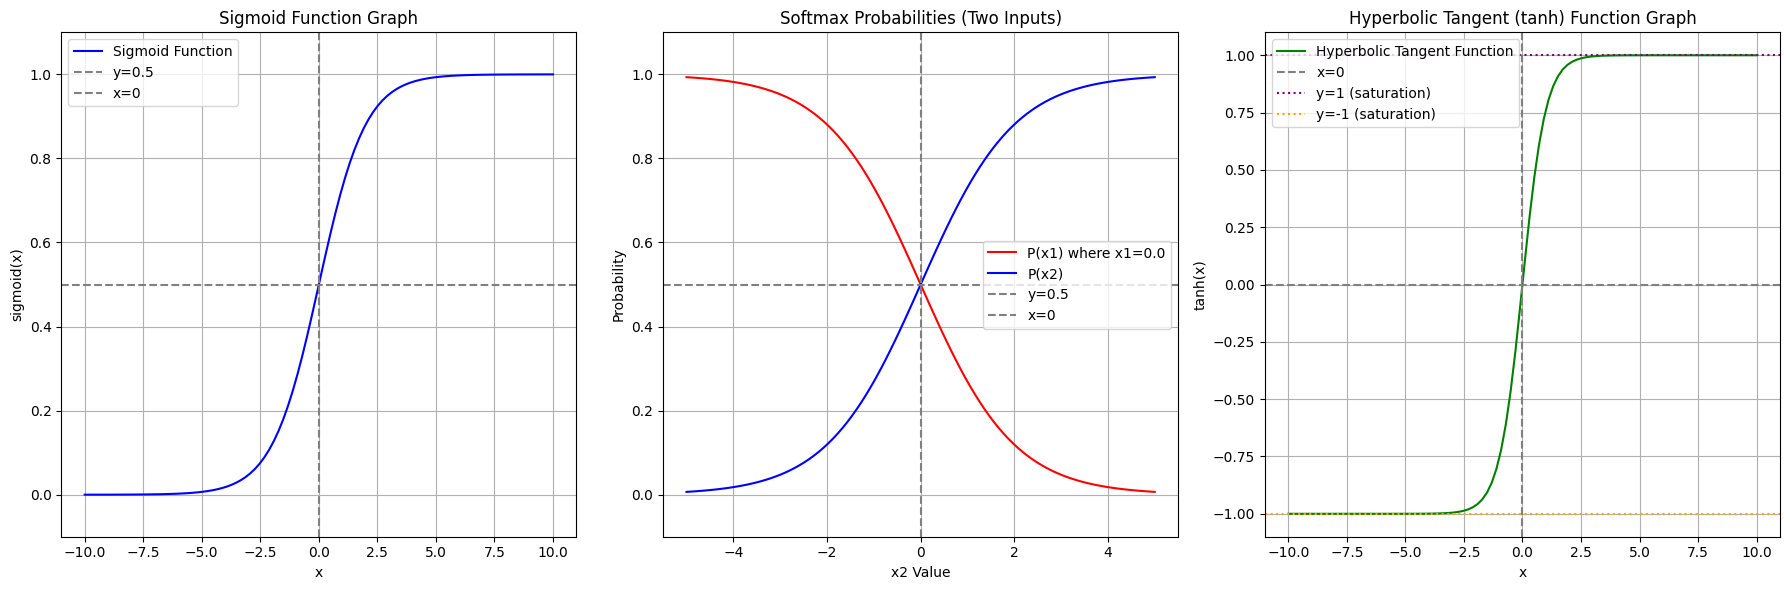

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수 정의
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# 소프트맥스 함수 정의 (2개 입력 예시)
def softmax_two_inputs(x_values, fixed_val):
  # x_values는 변화하는 한 축의 값들, fixed_val은 고정된 다른 축의 값
  prob1 = []
  prob2 = []
  for x2 in x_values:
    input_vector = np.array([fixed_val, x2])
    e_x = np.exp(input_vector - np.max(input_vector)) # 오버플로우 방지
    output = e_x / e_x.sum()
    prob1.append(output[0])
    prob2.append(output[1])
  return np.array(prob1), np.array(prob2)

# 하이퍼볼릭 탄젠트 함수 정의
def tanh(x):
  return np.tanh(x)

# ----------------- 각 함수 데이터 생성 -----------------

# 1. 시그모이드 데이터
x_sigmoid = np.linspace(-10, 10, 100)
y_sigmoid = sigmoid(x_sigmoid)

# 2. 소프트맥스 데이터 (2개 입력 예시)
x_softmax_range = np.linspace(-5, 5, 100)
fixed_x1_for_softmax = 0.0 # 소프트맥스 한 축 고정값 (x1)
prob_x1_softmax, prob_x2_softmax = softmax_two_inputs(x_softmax_range, fixed_x1_for_softmax)

# 3. 하이퍼볼릭 탄젠트 데이터
x_tanh = np.linspace(-10, 10, 100)
y_tanh = tanh(x_tanh)

# ----------------- 서브플롯 설정 및 그래프 그리기 -----------------

plt.figure(figsize=(18, 6)) # 전체 그림 크기 설정 (3개 플롯을 위해 가로를 더 넓게)

# 첫 번째 서브플롯: 시그모이드 함수
plt.subplot(1, 3, 1) # 1행 3열 중 첫 번째 플롯
plt.plot(x_sigmoid, y_sigmoid, label='Sigmoid Function', color='blue')
plt.title('Sigmoid Function Graph')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.axhline(y=0.5, color='gray', linestyle='--', label='y=0.5')
plt.axvline(x=0, color='gray', linestyle='--', label='x=0')
plt.legend()
plt.ylim(-0.1, 1.1) # y축 범위 설정

# 두 번째 서브플롯: 소프트맥스 함수 (2개 입력 예시)
plt.subplot(1, 3, 2) # 1행 3열 중 두 번째 플롯
plt.plot(x_softmax_range, prob_x1_softmax, label=f'P(x1) where x1={fixed_x1_for_softmax}', color='red')
plt.plot(x_softmax_range, prob_x2_softmax, label='P(x2)', color='blue')
plt.title('Softmax Probabilities (Two Inputs)')
plt.xlabel('x2 Value')
plt.ylabel('Probability')
plt.grid(True)
plt.axhline(y=0.5, color='gray', linestyle='--', label='y=0.5')
plt.axvline(x=0, color='gray', linestyle='--', label='x=0')
plt.legend()
plt.ylim(-0.1, 1.1) # y축 범위 설정

# 세 번째 서브플롯: 하이퍼볼릭 탄젠트 함수
plt.subplot(1, 3, 3) # 1행 3열 중 세 번째 플롯
plt.plot(x_tanh, y_tanh, label='Hyperbolic Tangent Function', color='green')
plt.title('Hyperbolic Tangent (tanh) Function Graph')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--', label='x=0')
plt.axhline(y=1, color='purple', linestyle=':', label='y=1 (saturation)')
plt.axhline(y=-1, color='orange', linestyle=':', label='y=-1 (saturation)')
plt.legend()
plt.ylim(-1.1, 1.1) # y축 범위 설정

plt.tight_layout() # 서브플롯 간의 간격 자동 조절
plt.show()

**지도 학습과 비지도 학습의 차이 이해하기**<br/>


*   Supervised Learning => 입력(feature)와 출력(label)이 쌍으로 주어진 데이터로 학습하여 새로운 입력에 대한 예측을 할 수 있는 모델
    * Regression, 회귀 : 현속적인 값을 예측하는 문제에서 사용됨
        * Linear Regression : 입력과 출력 간의 선형 관계를 찾아내는 모델링
        * Lasso Regression : L1 규제를 통해 과적합을 방지
        * Ridge Regression : L2 규제를 통해 과적합을 방지
    * Classification, 분류 : 이산적인(Discrete) 레이블을 예측하는 모델
        * Logistic Regression : Binary or Multi-class Classification
        * SVM, Support Vector Machines : 고차원 데이터를 공간으로 맵핑하여 결정경계(Decision Boundary)를 찾는 알고리즘
        * KNN, K-Nearest Neighbors : K개의 근접한 데이터 포인트(이웃)을 기반으로 분류
        * Decision Tree : 의사결정 규칙을 기반으로 데이터를 분류
        * Random Forest : 여러개의 결정트리를 결합하여 분류 (성능향상)
*   Unsupervised Learning => Label이 없는 데이터를 분석하는 방법, 숨겨진 패턴 찾기
    * Clustering, 군집화 : 데이터를 여러 그룹으로 나누는 방법
    * Dimensionality Reduction : 고차원 데이터를 저차원으로 변환해 중요한 정보만 남기는 방법
        * Pricipal Component Analysis



선형 회귀 모델 이해하기 : https://wikidocs.net/223377

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)


file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
data = pd.read_csv(file_url) # 데이터셋 읽기

print("data.head()\n", data.head())
print()
print("data.info()\n", data.info())
print()
print("data.describe()\n", data.describe())

data.head()
    age  sex     bmi  children  smoker      charges
0   19    0  27.900         0       1  16884.92400
1   18    1  33.770         1       0   1725.55230
2   28    1  33.000         3       0   4449.46200
3   33    1  22.705         0       0  21984.47061
4   32    1  28.880         0       0   3866.85520

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB
data.info()
 None

data.describe()
                age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.50

In [ ]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker']] # 독립변수
y = data['charges'] # 종속변수

from sklearn.model_selection import train_test_split # 사이킷런 임포트

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100) # 데이터셋 분할


from sklearn.linear_model import LinearRegression

model = LinearRegression( )
model.fit(X_train, y_train)


LinearRegression()

<Axes: xlabel='actual', ylabel='pred'>

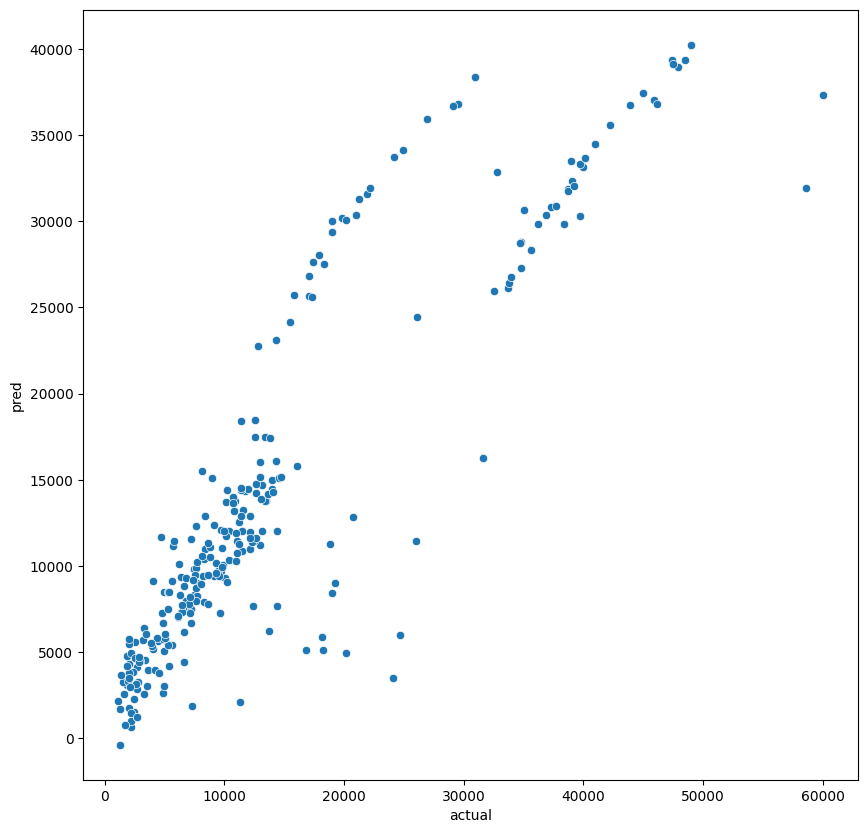

In [ ]:
pred = model.predict(X_test)

comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.scatterplot(x = 'actual', y = 'pred', data = comparison)


In [ ]:
from sklearn.metrics import mean_squared_error

print("RMSE=", mean_squared_error(y_test, pred)**0.5)

print("model.score=", model.score(X_train, y_train))


RMSE= 5684.927776334485
model.score= 0.7368220127747351


결정 트리 알고리즘 학습하기 : https://wikidocs.net/145537

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 123

cancer = load_breast_cancer()


In [2]:

x_train, x_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=SEED)


In [5]:
tree = DecisionTreeClassifier()

tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [6]:
pred = tree.predict(x_test)

# 코드를 입력해 주세요
accuracy = accuracy_score(pred, y_test)
print(f'정확도: {accuracy:.3f}')


정확도: 0.916


k-최근접 이웃(k-NN) 알고리즘 이해하기 : https://wikidocs.net/274026

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 붓꽃 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-최근접 이웃 모델 생성 (K=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# 모델 학습
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
# 테스트 데이터(X_test)에 대한 예측 수행
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


로지스틱 회귀 이해하기 : https://wikidocs.net/223390

In [ ]:
import pandas as pd # 판다스 라이브러리 임포트
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url) # 데이터셋 읽기

print("data.head()\n", data.head())

data['Name'] = data['Name'].astype('category')
data['Sex'] = data['Sex'].astype('category')
data['Ticket'] = data['Ticket'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')

print()
print("data.info()\n", data.info())
print()
print("data.describe()\n", data.describe())
print()

numeric_data = data.select_dtypes(include=['number'])
print("data.corr()\n", numeric_data.corr())

data.head()
    Pclass                                                 Name     Sex   Age  \
0       3                              Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0   
2       3                               Heikkinen, Miss. Laina  female  26.0   
3       1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                             Allen, Mr. William Henry    male  35.0   

   SibSp  Parch            Ticket Embarked  Survived  
0      1      0         A/5 21171        S         0  
1      1      0          PC 17599        C         1  
2      0      0  STON/O2. 3101282        S         1  
3      1      0            113803        S         1  
4      0      0            373450        S         0  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  

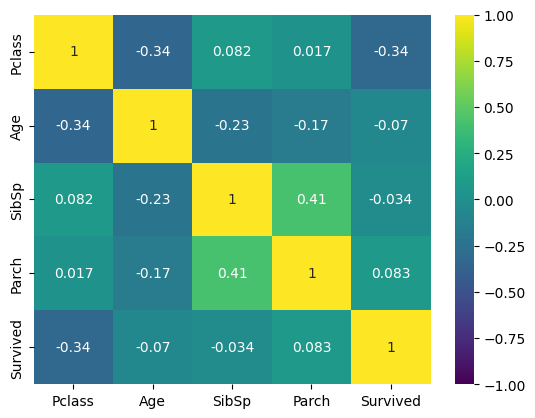

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(numeric_data.corr( ), cmap='viridis', vmin=-1, vmax=1, annot=True)
plt.show( )


In [ ]:
print("Name nuninque=", data['Name'].nunique())
print("Sex nuninque=", data['Sex'].nunique())
print("Ticket nuninque=", data['Ticket'].nunique())
print("Embarked nuninque=", data['Embarked'].nunique())

Name nuninque= 889
Sex nuninque= 2
Ticket nuninque= 680
Embarked nuninque= 3


In [ ]:
data = data.drop(['Name','Ticket'], axis=1)


In [ ]:
pd.get_dummies(data, columns = ['Sex','Embarked'])


,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,False,True,False,False,True
1,1,38.0,1,0,1,True,False,True,False,False
2,3,26.0,0,0,1,True,False,False,False,True
3,1,35.0,1,0,1,True,False,False,False,True
4,3,35.0,0,0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,False,True,False,False,True
885,1,19.0,0,0,1,True,False,False,False,True
886,3,28.0,1,2,0,True,False,False,False,True
887,1,26.0,0,0,1,False,True,True,False,False


In [ ]:
pd.get_dummies(data, columns = ['Sex','Embarked'], drop_first = True)

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,True,False,True
885,1,19.0,0,0,1,False,False,True
886,3,28.0,1,2,0,False,False,True
887,1,26.0,0,0,1,True,False,False


In [ ]:
data = pd.get_dummies(data, columns = ['Sex','Embarked'], drop_first = True)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('Survived', axis = 1) # 데이터셋에서 종속변수 제거 후 저장
y = data['Survived'] # 데이터셋에서 종속변수만 저장
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100) # 학습셋, 시험셋 분리

from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 임포트

model = LogisticRegression( ) # 로지스틱 회귀 모델 생성
model.fit(X_train, y_train) # 모델 학습
pred = model.predict(X_test) # 예측


In [ ]:
from sklearn.metrics import accuracy_score # 정확도 라이브러리 임포트

print("accuracy=", accuracy_score(y_test, pred))
print("model.coef_=", model.coef_)


accuracy= 0.7808988764044944
model.coef_= [[-1.18234354 -0.03991188 -0.32140308  0.00730054 -2.56910288 -0.07696271
  -0.23548312]]


In [ ]:
pd.Series(model.coef_[0], index = X.columns)

,0
Pclass,-1.182344
Age,-0.039912
SibSp,-0.321403
Parch,0.007301
Sex_male,-2.569103
Embarked_Q,-0.076963
Embarked_S,-0.235483


In [ ]:
X = data.drop('Survived', axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state = 100) # 학습셋, 시험셋 준비
model = LogisticRegression( ) # 모델 생성
model.fit(X_train, y_train) # 학습
pred = model.predict(X_test) # 예측
accuracy_score(y_test, pred) # 정확도 계산


0.7808988764044944

In [ ]:
data['family'] = data['SibSp'] + data['Parch'] # SibSp와 Parch 변수 합치기
data.drop(['SibSp','Parch'], axis=1, inplace=True) # SibSp와 Parch 변수 삭제
data.head( ) # 5행 출력


,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0


In [ ]:
X = data.drop('Survived', axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state = 100) # 학습셋, 시험셋 준비
model = LogisticRegression( ) # 모델 생성
model.fit(X_train, y_train) # 학습
pred = model.predict(X_test) # 예측
accuracy_score(y_test, pred) # 정확도 계산


0.7921348314606742

머신러닝 모델 평가 지표 학습하기

평가지표 정리 노트 : https://www.notion.so/7-2021ebda1846803aa2e7dc57f37bb793?source=copy_link#2021ebda18468029ae23e8dd064d4b64

나이브 베이즈 분류기 이해하기 : https://wikidocs.net/33665

In [14]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [15]:
import pandas as pd
from bs4 import BeautifulSoup
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle
import re
import numpy as np

def clean_english_documents(documents):
    #텍스트 정제 (HTML 태그 제거)
    for i, document in enumerate(documents):
        document = BeautifulSoup(document, 'html.parser').text
        documents[i] = document

    #텍스트 정제 (특수기호 제거)
    for i, document in enumerate(documents):
        document = re.sub(r'[^ A-Za-z]', '', document) #특수기호 제거, 정규 표현식
        documents[i] = document

    #텍스트 정제 (불용어 제거)
    nltk.download('punkt')
    nltk.download('stopwords')
    for i, document in enumerate(documents):
        clean_words = []
        for word in nltk.tokenize.word_tokenize(document):
            word = word.lower()
            if word not in nltk.corpus.stopwords.words('english'): #불용어 제거
                clean_words.append(word)
        document = ' '.join(clean_words)
        documents[i] = document

    #텍스트 정제 (형태소 분석)
    nltk.download('averaged_perceptron_tagger')
    for i, document in enumerate(documents):
        clean_words = []
        for word in nltk.tag.pos_tag(nltk.tokenize.word_tokenize(document)):
            if word[1] in ['NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS']: #명사, 동사, 형용사
                clean_words.append(word[0])
        document = ' '.join(clean_words)
        document = document.lower()
        documents[i] = document

    #텍스트 정제 (어간 추출)
    for i, document in enumerate(documents):
        clean_words = []
        for word in nltk.tokenize.word_tokenize(document):
            word = word.lower()
            stemmer = nltk.stem.snowball.SnowballStemmer('english')
            word = stemmer.stem(word) #어간 추출
            clean_words.append(word)
        document = ' '.join(clean_words)
        documents[i] = document

    return documents

##########데이터 로드

x_data = np.array([
    #부정
    'stale and uninspired',
    'hate it',
    'utterly incompetent conclusion',
    'pointless',
    'be disappointed',
    #긍정
    'a sincere performance',
    'The performances are an absolute joy',
    'They works spectacularly well',
    'entertaining',
    'This is a heartfelt story'
])
y_data = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

labels = ['부정', '긍정']

##########데이터 분석

##########데이터 전처리

x_data = clean_english_documents(x_data) #텍스트 정제
transformer = TfidfVectorizer()
transformer.fit(x_data)
x_data = transformer.transform(x_data) #단어 카운트 가중치

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777, stratify=y_data)

##########모델 생성

model = MultinomialNB(alpha=1.0)

##########모델 학습

model.fit(x_train, y_train)

##########모델 검증

print(model.score(x_test, y_test)) #1.0

##########모델 예측

x_test = np.array([
    'This is joyful story'
])
x_test = clean_english_documents(x_test) #텍스트 정제
x_test = transformer.transform(x_test) #단어 카운트 가중치

y_predict = model.predict(x_test)
label = labels[y_predict[0]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]

print(label, confidence) #


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0.3333333333333333
긍정 0.5290912512436124


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
